In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3 * x **2 - 4 * x + 5

In [3]:
f(3)

20

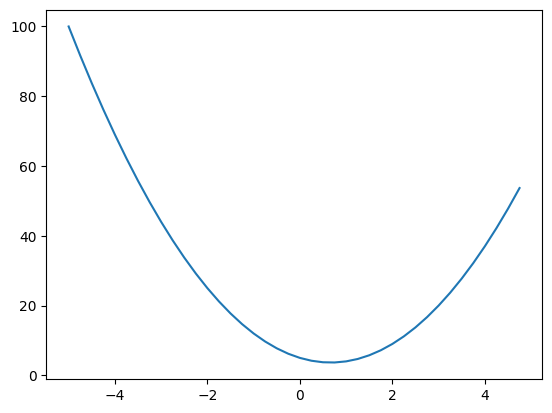

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)

plt.plot(xs, ys)

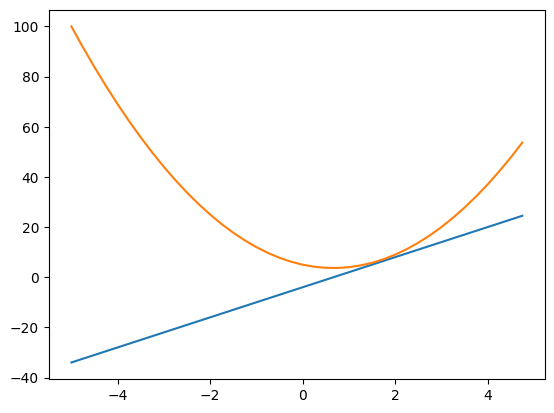

In [5]:
h = 0.000001

L = (f(xs + h) - f(xs)) / h

plt.plot(xs, L)
plt.plot(xs, ys)

In [6]:
a = 2.0
b = -3
c = 10

d = a * b + c

print(d)

4.0


In [7]:
a = 2.0
b = -3
c = 10

d1 = a * b + c
c += h
d2 = a * b + c

print(f"d1: {d1}")
print(f"d2: {d2}")
print(f"Slope: {(d2 - d1) / h}")

d1: 4.0
d2: 4.000000999999999
Slope: 0.9999999992515995


In [103]:
# Creating a value object
class Value:

    def __init__(self, data, _children=[], _op="", label=""):
        self.data = data
        self._backward = lambda: None
        self.grad = 0.0 # 0 means no change
        self._prev = set(_children) # using set only for efficiency
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        """Add function"""
        sum = Value(self.data + other.data, (self, other), "+")

        def _backward():
            self.grad = 1.0 * sum.grad
            other.grad = 1.0 * sum.grad

        sum._backward = _backward

        return sum
    
    def __mul__(self, other):
        """Multiplication function"""
        prod = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad = other.data * prod.grad 
            other.grad = self.data * prod.grad

        prod._backward = _backward
        return prod
    
    def tanh(self):
        """tanh function"""
        x = self.data
        tanh = (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

        output = Value(tanh, (self, ), "tanh")

        def _backward():
            self.grad = (1 - tanh ** 2) * output.grad

        output._backward = _backward
            
        return output
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b
e.label = "e"
f = Value(-2.0, label="f")
d = e + c
d.label = "d"

L = d * f
L.label = "L" 

In [9]:
d, d._prev, d._op

(Value(data=4.0), {Value(data=-6.0), Value(data=10.0)}, '+')

In [10]:
# !pip install graphviz

In [11]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)

            for child in v._prev:
                edges.add((child, v))

                build(child)
    build(root)

    return nodes, edges

def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={'rankdir': "LR"})

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))

        dot.node(name=uid, label="{%s | data % .4f | grad %.4f}" % (n.label, n.data, n.grad), shape="record")

        if n._op:
            dot.node(name=uid+n._op, label=n._op)

            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

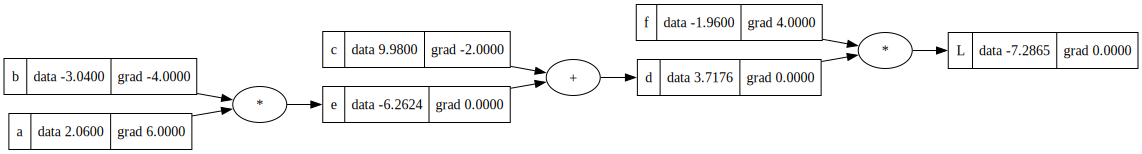

In [30]:
draw_dot(L)

In [13]:
L.grad = 1

In [17]:
f.grad = d.data
d.grad = f.data

In [19]:
e.grad = f.data
c.grad = f.data

In [21]:
a.grad = f.data * b.data
b.grad = f.data * a.data

In [23]:
# Now 2nd epoch for forward propagation
learning_rate = 0.01

a.data += learning_rate * a.grad
b.data += learning_rate * b.grad

In [25]:
c.data += learning_rate * c.grad
f.data += learning_rate * f.grad

In [27]:
e = a * b
d = e + c
L = d * f

In [29]:
e.label = "e"
d.label = "d"
L.label = "L"

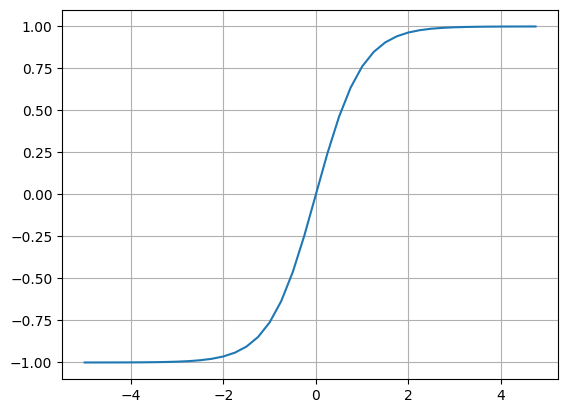

In [31]:
xs = np.arange(-5, 5, 0.25)
ys = np.tanh(xs)

plt.plot(xs, ys)
plt.grid()

In [104]:
# Inputs
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# Weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
# bias
b = Value(6.8813735870195432, label="b")

x1w1 = x1 * w1; x1w1.label="x1w1"
x2w2 = x2 * w2; x2w2.label="x2w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1x2w2"
n = x1w1x2w2 + b; n.label="n"

o = n.tanh()
o.label = "o"

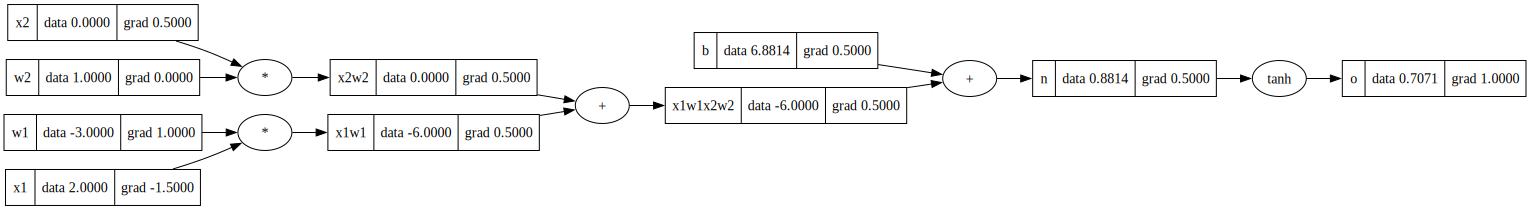

In [111]:
draw_dot(o)

In [106]:
o.grad = 1 

In [107]:
o._backward()   

In [108]:
n._backward()

In [109]:
x1w1x2w2._backward()

In [110]:
x1w1._backward()
x2w2._backward()